In [1]:
import numpy as np
import pandas as pd
from itertools import product
import matplotlib.pyplot as plt

In [2]:
def collect_data(path='data/sys_lab5.txt'):
    file = open(path, 'r')
    data = file.read()
    file.close()
    for matrix in data.split(';'):
        yield pd.DataFrame(np.array([el.split() for el in matrix.split('\n') if el]).flatten().reshape(4, 7)).apply(
                pd.to_numeric)

In [18]:
def alpha(a_hat, I_p_hat, I_d_hat, I_t_hat):
    return np.exp(I_p_hat+I_d_hat+I_t_hat)*(1+a_hat)
def I_p(t, I_p_hat):
    a = (1-1e-4**2)/(1-I_p_hat - 1e-4)**2 - 1
    return min(t/np.sqrt(1+a*t**2)+I_p_hat, 1)

def I_d(t, I_d_hat):
    c = np.log(2*np.exp(1-I_d_hat)-1)
    return min(np.log(1+np.exp(c*t))-np.log(2)+I_d_hat, 1)
    
def I_t(t, I_t_hat):
    return max(I_t_hat*(1 - t**2),0)

def I(t, I_p_hat, I_d_hat, I_t_hat):
    return I_p(t, I_p_hat)*I_d(t, I_d_hat)*I_t(t, I_t_hat)

entropy = np.vectorize(
    lambda t, a_hat, I_p_hat, I_d_hat, I_t_hat: 1
    - np.log(
        1 + alpha(a_hat, I_p_hat, I_d_hat, I_t_hat) * I(t, I_p_hat, I_d_hat, I_t_hat)
    )
)

In [19]:
def get_interval(a,space):
    if np.linalg.norm(a):
        start = np.argmax(a)
        end = np.argmin(a[start:])
        return [space[start],space[end]]
    else:
        return "Empty"

In [20]:
class IneqSolver(object):
    def __init__(self,param_dict, linspace = np.linspace(0,1,1001)):
        self.param_dict = param_dict
        self.linspace = linspace
        self.solution = None
        self.inequlity = lambda f,t,bound1,bound2, params: (f(t,**params)<=bound2)*(f(t,**params)>=bound1)
        
    def solve(self,func, bound1, bound2):
        self.solution = self.inequlity(func, self.linspace, bound1, bound2, self.param_dict)
        return self
    
    def get_interval(self):
        if np.linalg.norm(self.solution):
            start = np.argmax(self.solution)
            end = np.argmin(self.solution[start:])
            return [self.linspace[start],self.linspace[end]]
        else:
            return "Empty"

In [21]:
lspace = np.linspace(0,1,1001)
tables = {k: v for k, v in zip(['a_hat', 'I_p_hat', 'I_t_hat', 'I_d_hat'],list(collect_data("../data/sys_lab5.txt")))}
select = lambda i, j: {k: v for k, v in zip(['a_hat', 'I_p_hat', 'I_t_hat', 'I_d_hat'],[matrix.iat[i, j] for matrix in tables.values()])}

{'a_hat': 0.6, 'I_p_hat': 0.65, 'I_t_hat': 0.3, 'I_d_hat': 0.7}


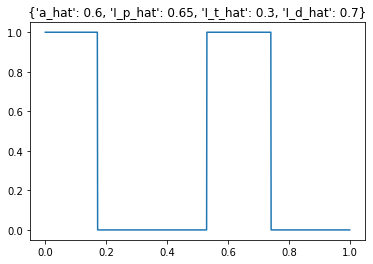

[0.0, 0.17200000000000001]
{'a_hat': 0.5, 'I_p_hat': 0.55, 'I_t_hat': 0.54, 'I_d_hat': 0.8}


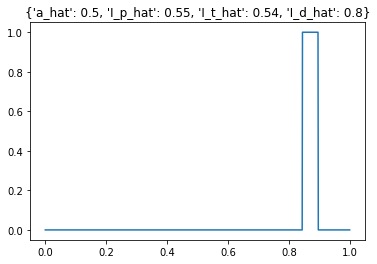

[0.845, 0.052000000000000005]
{'a_hat': 0.4, 'I_p_hat': 0.8, 'I_t_hat': 0.5, 'I_d_hat': 0.4}


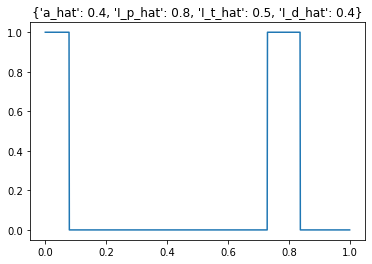

[0.0, 0.079]
{'a_hat': 0.55, 'I_p_hat': 0.45, 'I_t_hat': 0.4, 'I_d_hat': 0.6}


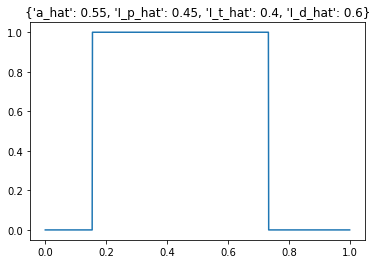

[0.155, 0.579]
{'a_hat': 0.0, 'I_p_hat': 0.0, 'I_t_hat': 0.0, 'I_d_hat': 0.0}


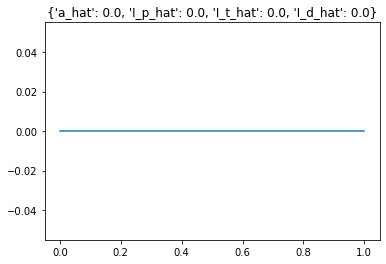

Empty
{'a_hat': 0.755, 'I_p_hat': 0.7, 'I_t_hat': 0.5, 'I_d_hat': 0.85}


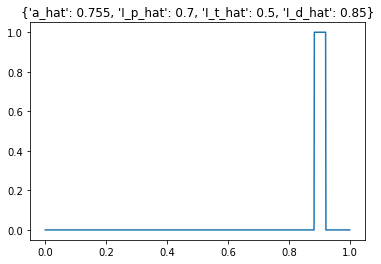

[0.884, 0.038]
{'a_hat': 0.45, 'I_p_hat': 0.75, 'I_t_hat': 0.4, 'I_d_hat': 0.5}


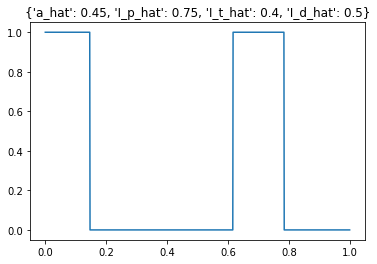

[0.0, 0.147]
{'a_hat': 0.0, 'I_p_hat': 0.0, 'I_t_hat': 0.0, 'I_d_hat': 0.0}


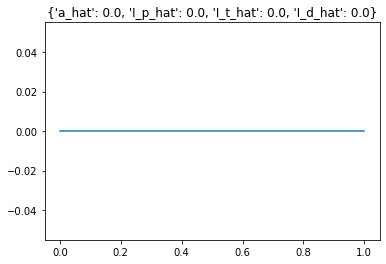

Empty
{'a_hat': 0.0, 'I_p_hat': 0.0, 'I_t_hat': 0.0, 'I_d_hat': 0.0}


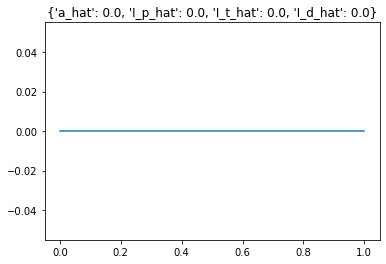

Empty
{'a_hat': 0.7, 'I_p_hat': 0.5, 'I_t_hat': 0.65, 'I_d_hat': 0.5}


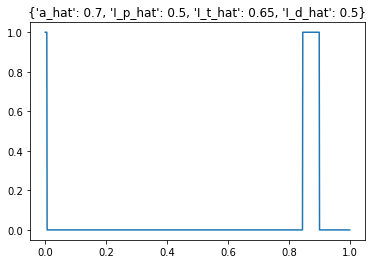

[0.0, 0.006]
{'a_hat': 0.35, 'I_p_hat': 0.8, 'I_t_hat': 0.25, 'I_d_hat': 0.4}


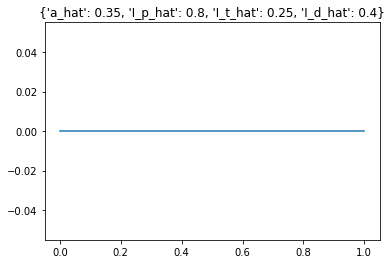

Empty
{'a_hat': 0.0, 'I_p_hat': 0.0, 'I_t_hat': 0.0, 'I_d_hat': 0.0}


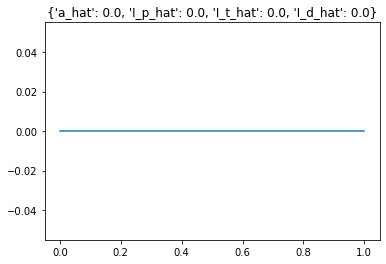

Empty
{'a_hat': 0.0, 'I_p_hat': 0.0, 'I_t_hat': 0.0, 'I_d_hat': 0.0}


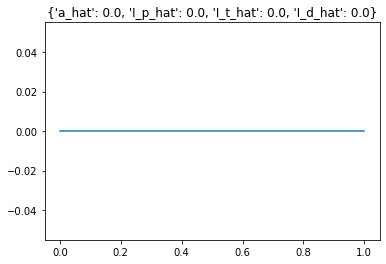

Empty
{'a_hat': 0.7, 'I_p_hat': 0.45, 'I_t_hat': 0.5, 'I_d_hat': 0.4}


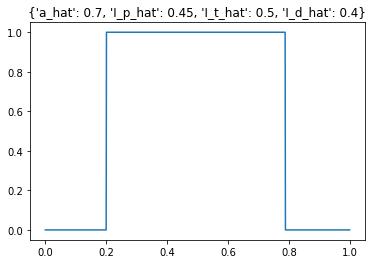

[0.201, 0.588]
{'a_hat': 0.65, 'I_p_hat': 0.45, 'I_t_hat': 0.35, 'I_d_hat': 0.25}


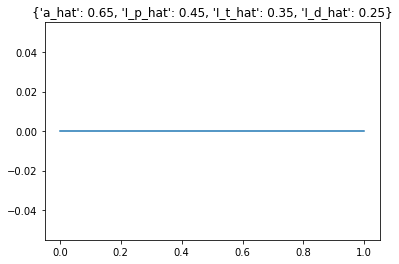

Empty
{'a_hat': 0.0, 'I_p_hat': 0.0, 'I_t_hat': 0.0, 'I_d_hat': 0.0}


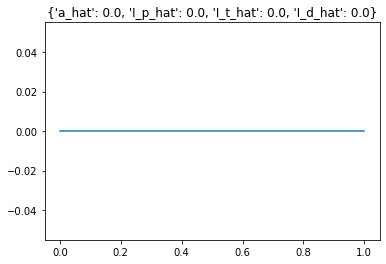

Empty
{'a_hat': 0.8, 'I_p_hat': 0.6, 'I_t_hat': 0.35, 'I_d_hat': 0.76}


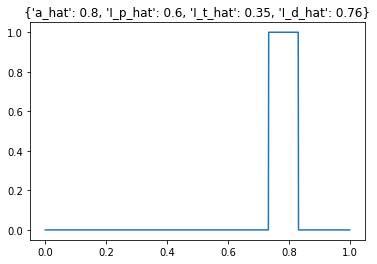

[0.734, 0.098]
{'a_hat': 0.65, 'I_p_hat': 0.5, 'I_t_hat': 0.4, 'I_d_hat': 0.45}


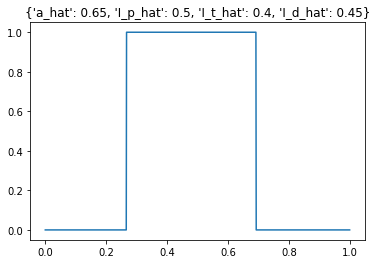

[0.267, 0.426]
{'a_hat': 0.7, 'I_p_hat': 0.6, 'I_t_hat': 0.2, 'I_d_hat': 0.3}


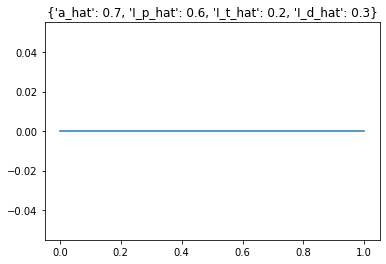

Empty
{'a_hat': 0.65, 'I_p_hat': 0.45, 'I_t_hat': 0.45, 'I_d_hat': 0.5}


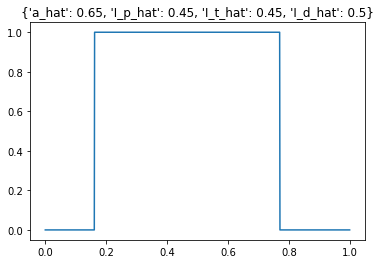

[0.162, 0.609]
{'a_hat': 0.7, 'I_p_hat': 0.45, 'I_t_hat': 0.3, 'I_d_hat': 0.6}


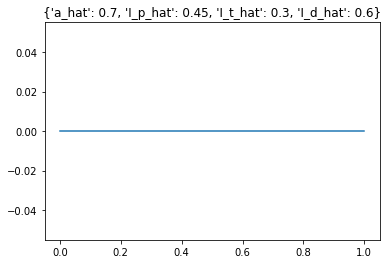

Empty


In [24]:
for i,j in product(range(3),range(7)):
    param_dict = select(i,j)
    print(param_dict)
    solver = IneqSolver(param_dict,lspace)
    solution = solver.solve(entropy, 0.1, 0.3)
    plt.title(str(solver.param_dict))
    plt.plot(solver.linspace,solver.solution)
    plt.show()
    print(solver.get_interval())

In [11]:
##EXAMPLE
for i,j in product(range(3),range(7)):
    param_dict = select(i,j)
    print(param_dict)
    solution = inequlity(entropy,lspace,0.1,0.3, param_dict)
    plt.title(str(param_dict))
    plt.plot(lspace,solution)
    plt.show()
    print(get_interval(solution,lspace))

{'a_hat': 0.6, 'I_p_hat': 0.65, 'I_t_hat': 0.3, 'I_d_hat': 0.7}


NameError: name 'inequlity' is not defined